# Plot Reward Function

Import packages

In [1]:
from packaging import version

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

import scienceplots
mpl.rc_file_defaults()
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams["legend.edgecolor"] = 'black'
plt.rc('legend', fontsize=10)

Plot all curves

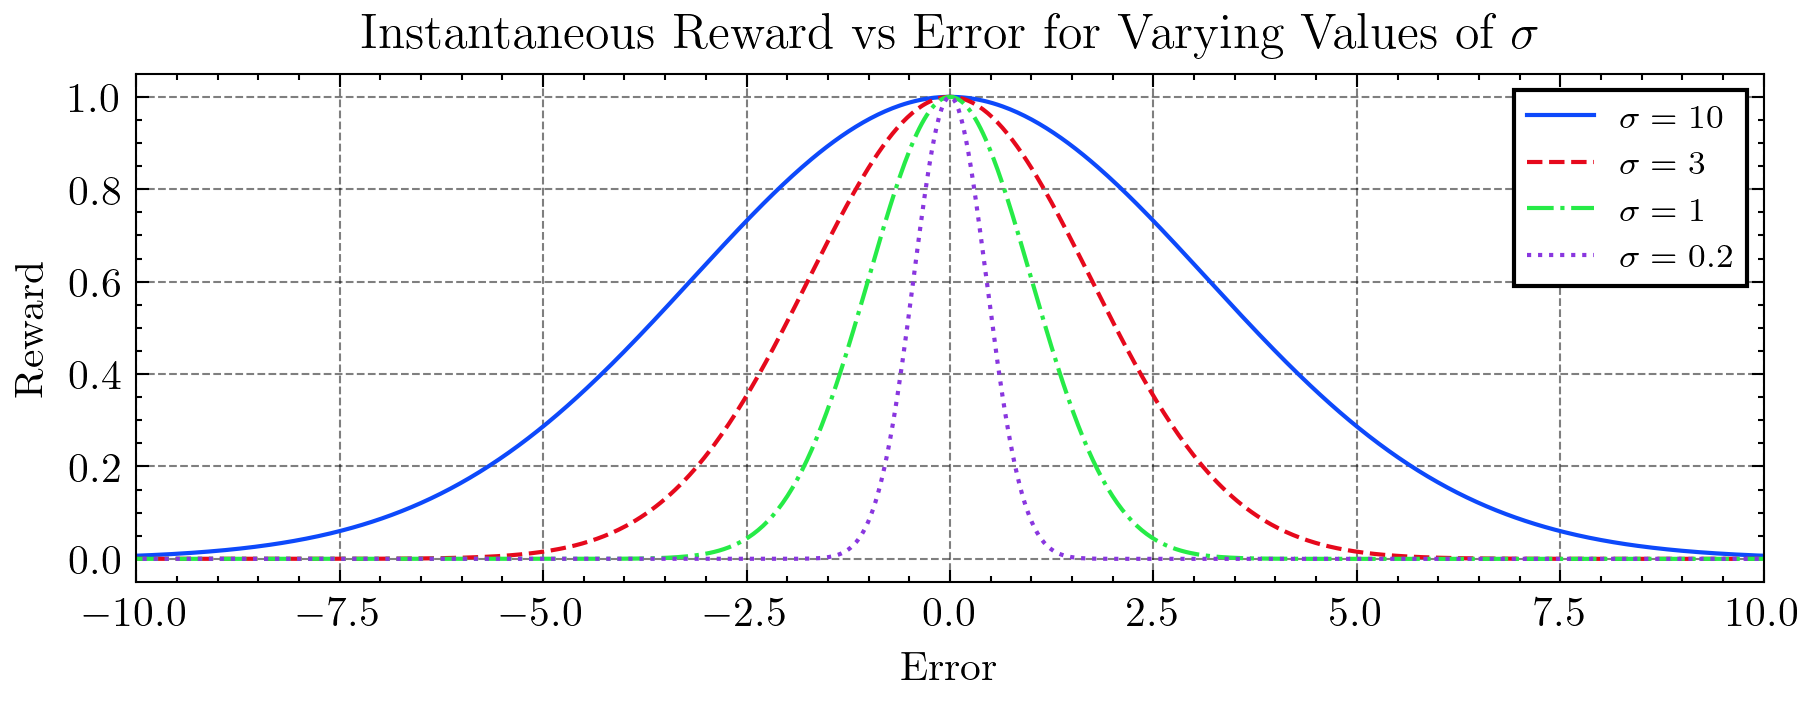

In [5]:
plt.style.use(['science', 'grid', 'high-vis'])
plt.rcParams['figure.figsize'] = [7, 2.2]

sigma = [10, 3, 1, 0.2]

x = np.linspace(-15, 15, 1000)

fig, ax = plt.subplots()

for sigma_i in sigma:
    y = np.exp(-0.5 * (x**2) / sigma_i)
    ax.plot(x, y, label=f"$\sigma={sigma_i}$")

ax.legend(fontsize=8, fancybox=False, edgecolor='black')
ax.set_xlabel('Error')
ax.set_ylabel('Reward')
ax.set_xlim([-10, 10])
ax.set_title('Instantaneous Reward vs Error for Varying Values of $\sigma$')


plt.savefig('images/modelBRewardFunction-v2.pdf', dpi=300)

plt.show()

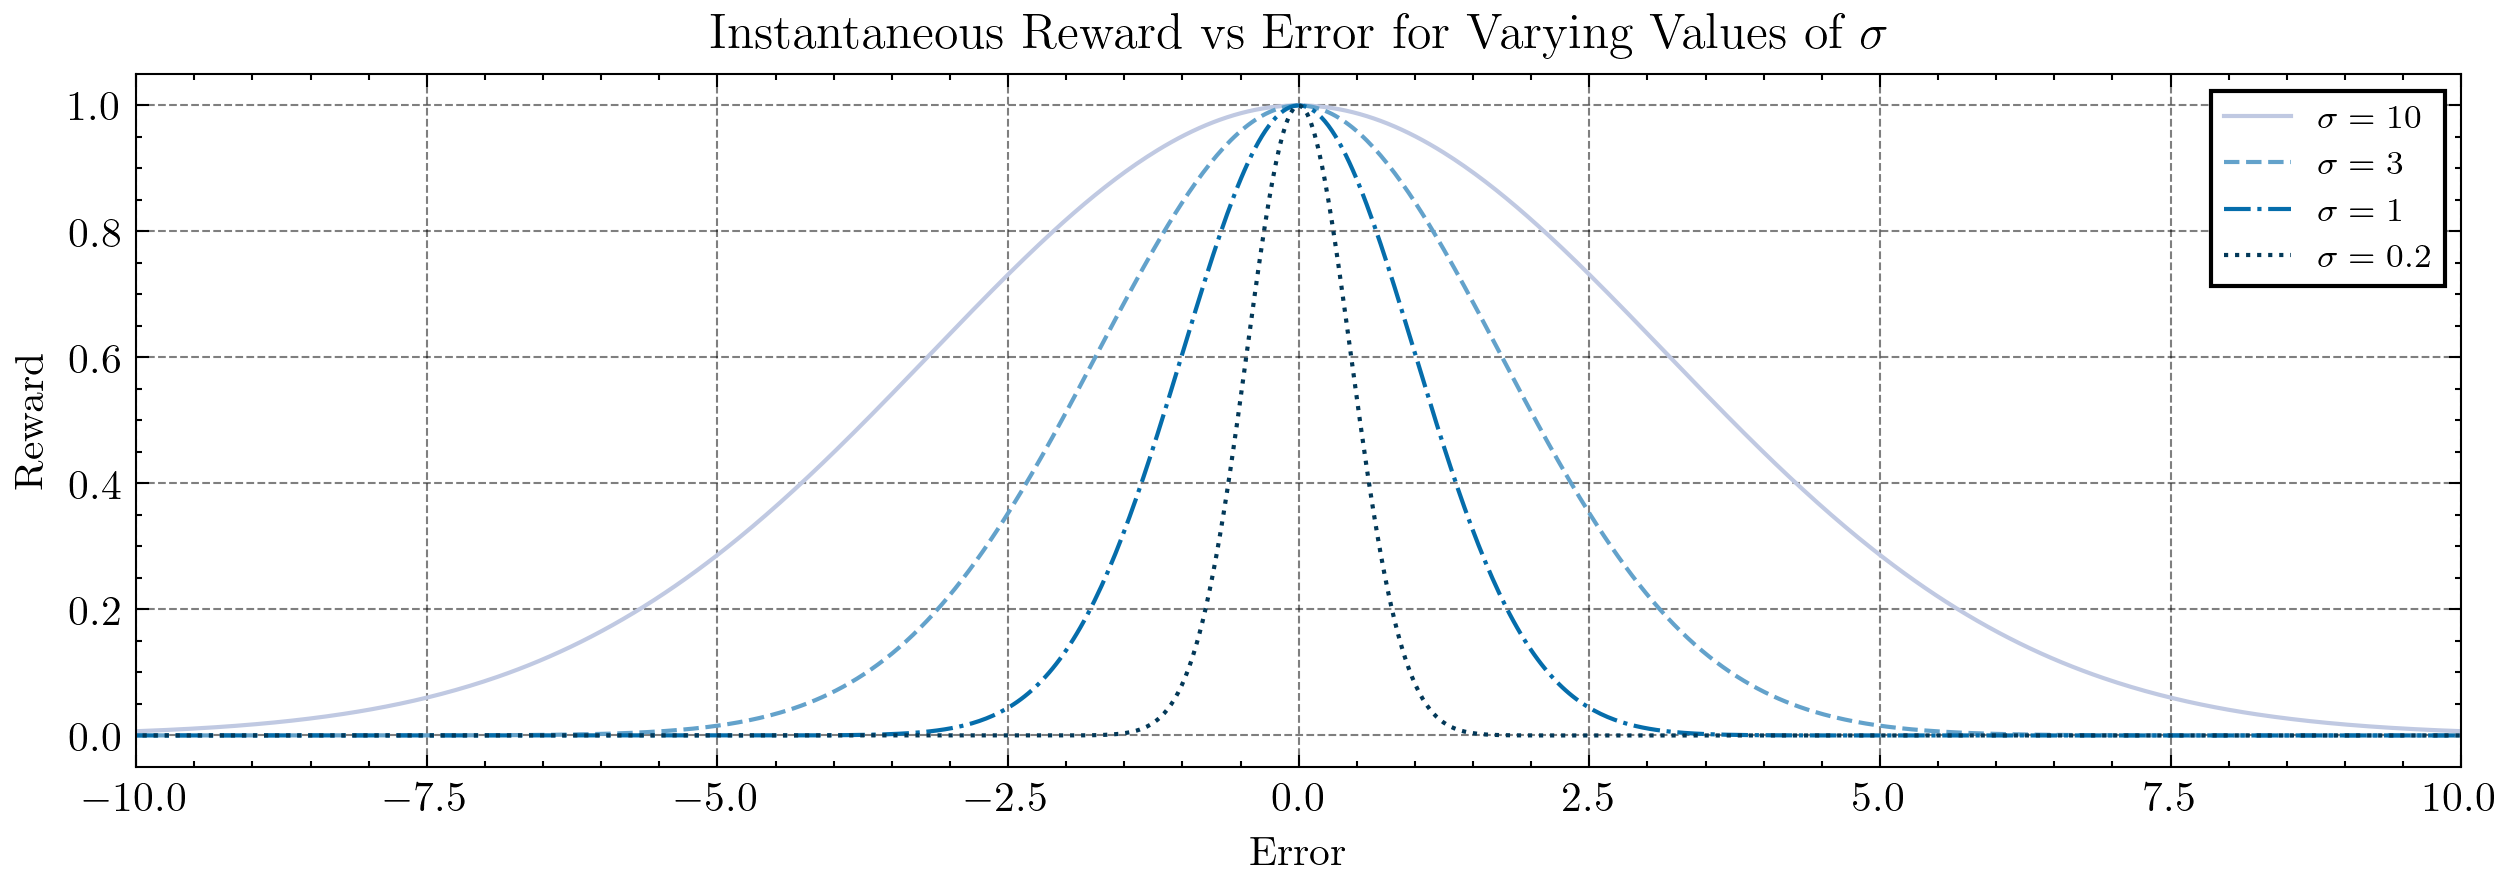

[[0.75238754 0.78946559 0.88538255 1.        ]
 [0.39006536 0.63660131 0.79607843 1.        ]
 [0.01902345 0.42635909 0.66974241 1.        ]
 [0.00784314 0.21960784 0.34509804 1.        ]]


In [2]:

plt.style.use(['science', 'grid', 'high-vis'])
plt.rcParams['figure.figsize'] = [10, 3]

colors = plt.cm.RdPu(np.linspace(0.3,1,4))
colors = plt.cm.PuBu(np.linspace(0.3,1,4))

sigma = [10, 3, 1, 0.2]

x = np.linspace(-15, 15, 1000)

fig, ax = plt.subplots()

for i, sigma_i in enumerate(sigma):
    y = np.exp(-0.5 * (x**2) / sigma_i)
    ax.plot(x, y, label=f"$\sigma={sigma_i}$", color=colors[i])

ax.legend(fontsize=8, fancybox=False, edgecolor='black')
ax.set_xlabel('Error')
ax.set_ylabel('Reward')
ax.set_xlim([-10, 10])
ax.set_title('Instantaneous Reward vs Error for Varying Values of $\sigma$')


# plt.savefig('images/modelBRewardFunction.png', dpi=300)

plt.show()
print(colors)

In [6]:

colorsRand = plt.cm.PuBu(np.linspace(0.15,0.6,3))
print(colorsRand)

for c in colorsRand:
    print(mpl.colors.to_hex(c, keep_alpha=False))


[[0.90439062 0.88930411 0.93997693 1.        ]
 [0.64867359 0.74025375 0.8582699  1.        ]
 [0.26039216 0.58431373 0.76470588 1.        ]]
#e7e3f0
#a5bddb
#4295c3


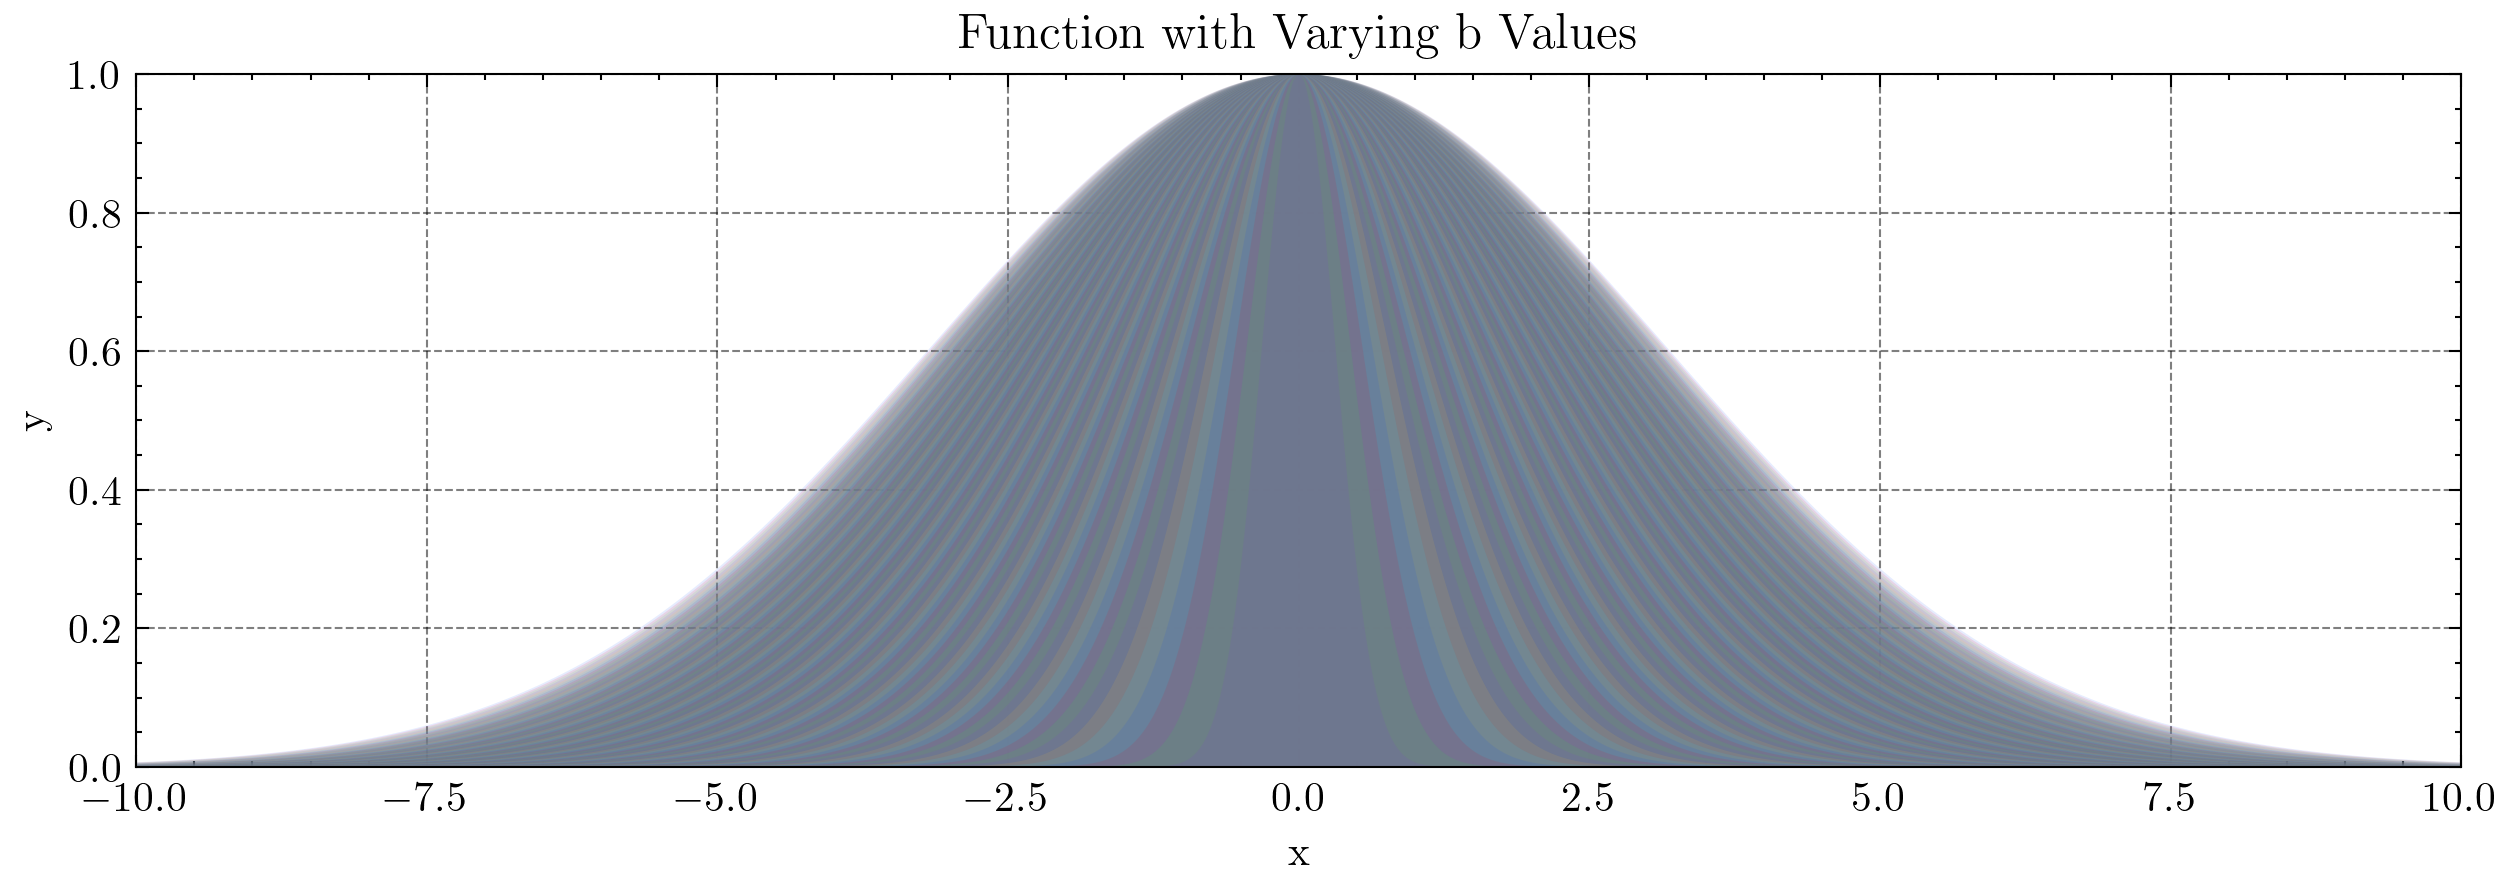

In [10]:
# Define the function
def func(x, b):
    a = 1
    return a * np.exp(-x**2 / (2*b))

# Define the values of b
b_values = np.linspace(10, 0.1, 100)

# Create the filled plot
x = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots()
for b in b_values:
    y = func(x, b)
    ax.fill_between(x, y, alpha=0.1)
ax.set_xlim(-10, 10)
ax.set_ylim(0, 1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Function with Varying b Values')
plt.show()

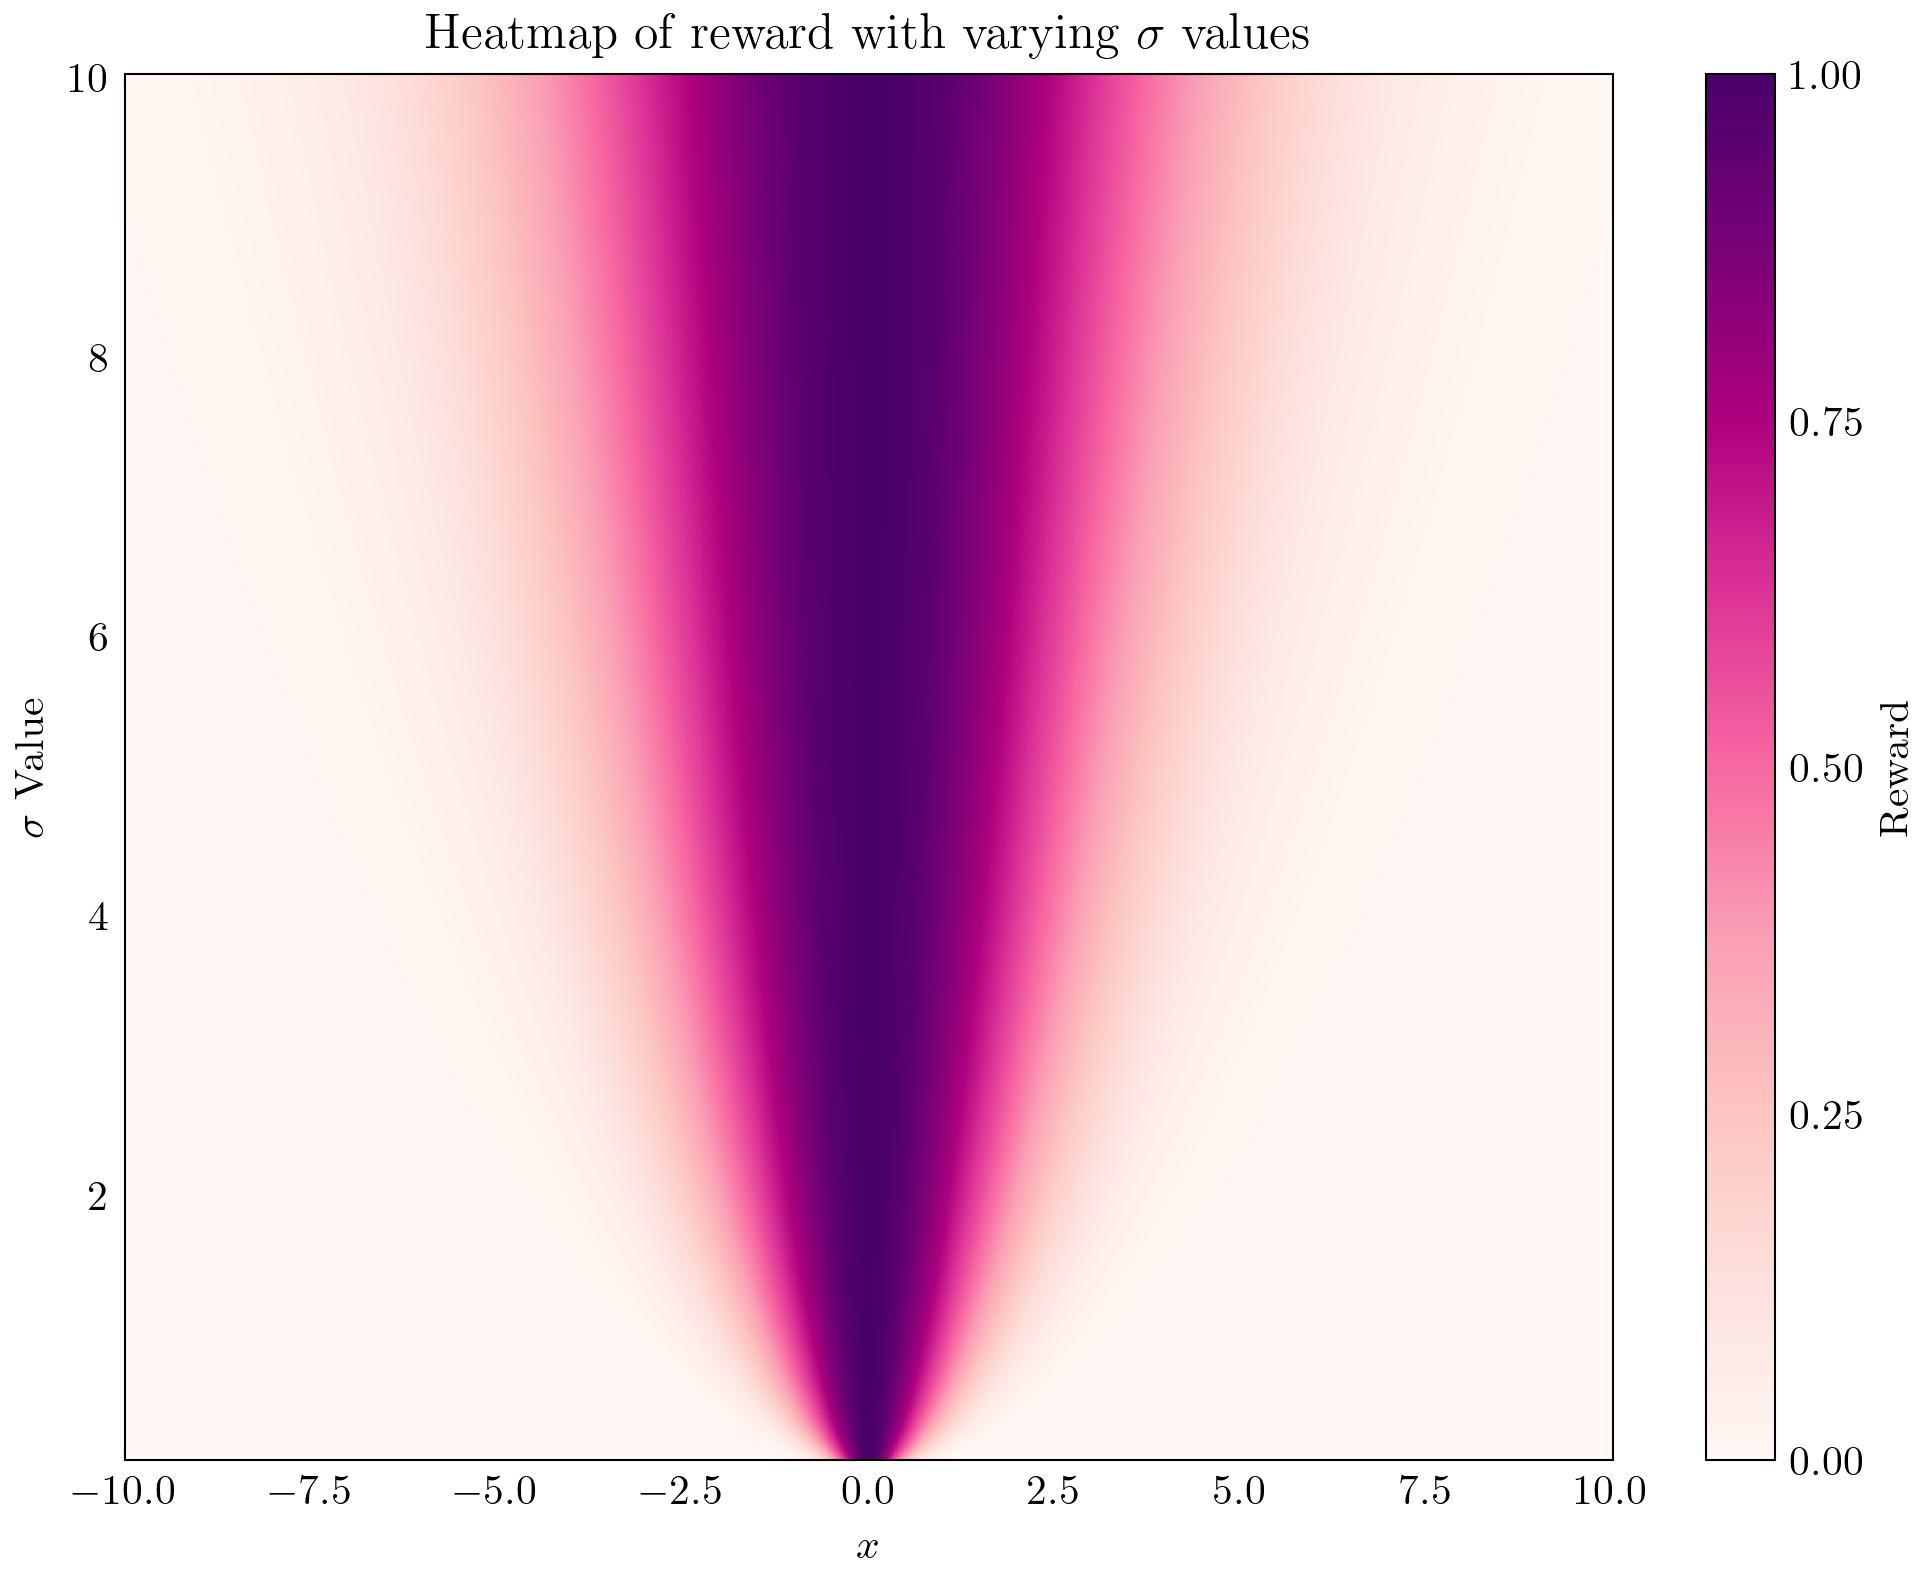

In [3]:
plt.style.use(['science', 'grid', 'high-vis'])

a = 1
b = np.logspace(1, -1, num=1000)
x = np.linspace(-10, 10, num=1000)

X, B = np.meshgrid(x, b)
Y = a * np.exp(-(X**2)/(2*B))

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.pcolormesh(x, b, Y, cmap='RdPu', vmin=0, vmax=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$\sigma$ Value')
ax.set_title('Heatmap of reward with varying $\sigma$ values')
cbar = fig.colorbar(im, ticks=[0, 0.25, 0.5, 0.75, 1.0], orientation='vertical')
cbar.ax.set_ylabel('Reward')
# plt.savefig('images/modelBRewardFunctionHeatmap.png', dpi=300)

plt.show()


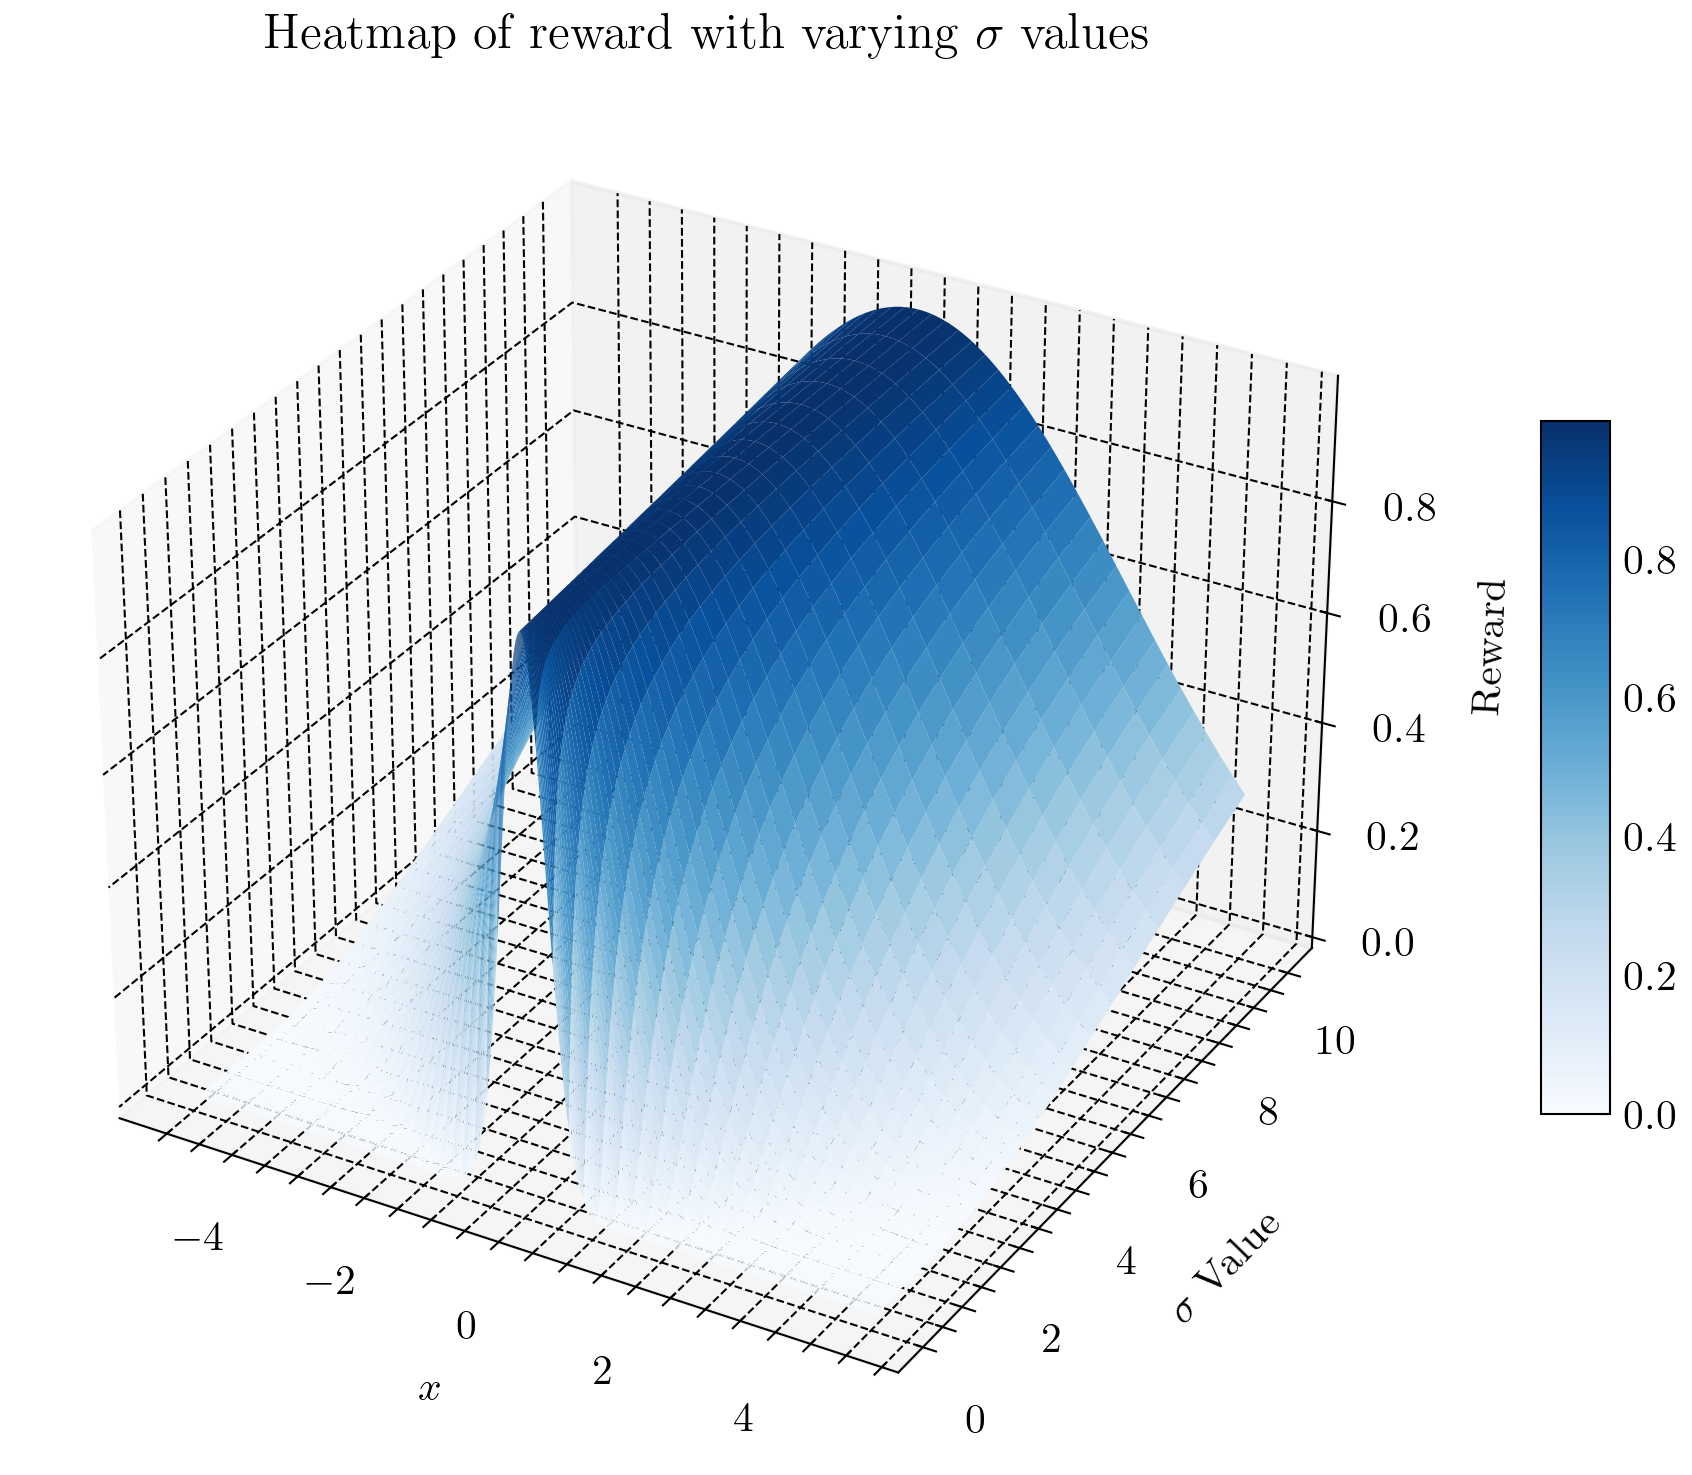

In [4]:
plt.style.use(['science', 'grid', 'high-vis'])


from mpl_toolkits.mplot3d import Axes3D

a = 1
b = np.logspace(1, -1, num=1000)
x = np.linspace(-5, 5, num=1000)

X, B = np.meshgrid(x, b)
Y = a * np.exp(-(X**2)/(2*B))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, B, Y, cmap='Blues')

ax.set_xlabel('$x$')
ax.set_ylabel('$\sigma$ Value')
ax.set_zlabel('Reward')
ax.set_title('Heatmap of reward with varying $\sigma$ values')

fig.colorbar(surf, shrink=0.5, aspect=10, pad=0.075)

plt.savefig('images/modelBRewardFunctionSurfacePlot.png', dpi=300)


plt.show()

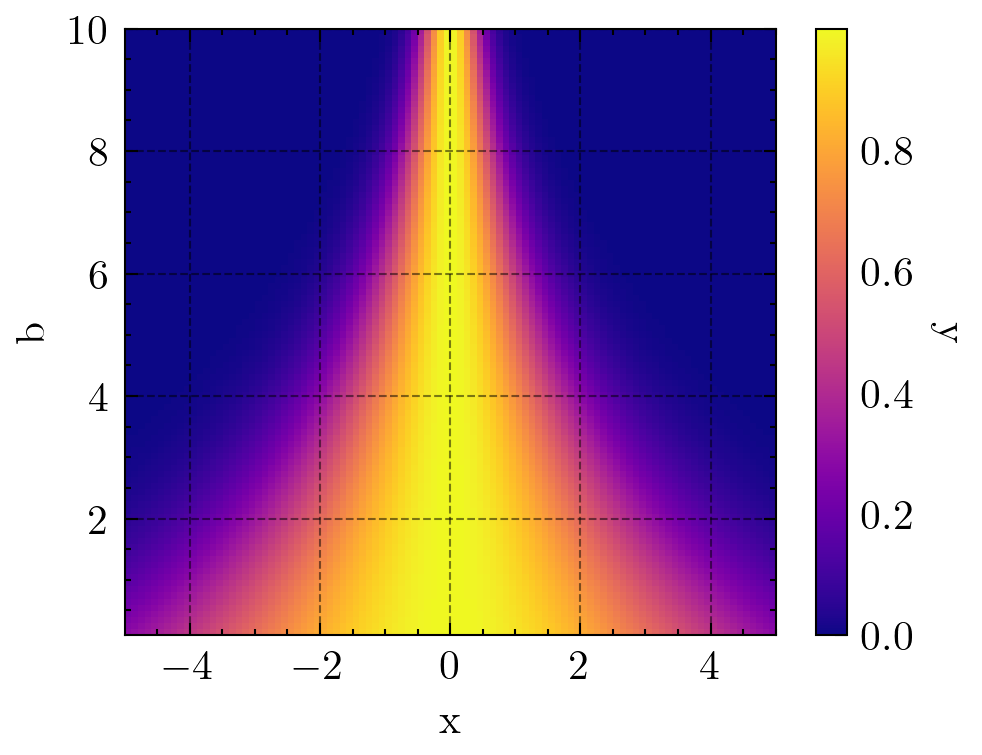

In [17]:
plt.style.use(['science', 'grid', 'high-vis'])

def func(x, b):
    a = 1
    return a * np.exp(-x**2/(2*b))

# Create a meshgrid for x and b values
x = np.linspace(-5, 5, 100)
b = np.logspace(-1, 1, 100)

# Evaluate the function for all x and b values
y = func(x[:, np.newaxis], b)

# Create the heatmap
fig, ax = plt.subplots()
im = ax.imshow(y.T, cmap='plasma'
               , extent=[x.min(), x.max(), b.min(), b.max()])
ax.set_xlabel('x')
ax.set_ylabel('b')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('y', rotation=-90, va='bottom')

plt.show()